In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Import the requests library.
import requests
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the API key.
from config import weather_api_key

In [5]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | ternate
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | marcona
City not found. Skipping...
Processing Record 7 of Set 1 | abengourou
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | tazovskiy
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | westport
Processing Record 15 of Set 1 | gamba
Processing Record 16 of Set 1 | gorom-gorom
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | samusu
City not found. Skipping...
Processing Record 19 of Set 1 | chuy
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 21 of Set 1 | jamestow

City not found. Skipping...
Processing Record 36 of Set 4 | kasangulu
Processing Record 37 of Set 4 | ajdabiya
Processing Record 38 of Set 4 | mvomero
Processing Record 39 of Set 4 | hambantota
Processing Record 40 of Set 4 | khammam
Processing Record 41 of Set 4 | noumea
Processing Record 42 of Set 4 | utete
Processing Record 43 of Set 4 | alofi
Processing Record 44 of Set 4 | srivardhan
Processing Record 45 of Set 4 | gerash
Processing Record 46 of Set 4 | silifke
Processing Record 47 of Set 4 | cap malheureux
Processing Record 48 of Set 4 | walvis bay
Processing Record 49 of Set 4 | san miguel
Processing Record 50 of Set 4 | ugoofaaru
Processing Record 1 of Set 5 | husavik
Processing Record 2 of Set 5 | henties bay
Processing Record 3 of Set 5 | constitucion
Processing Record 4 of Set 5 | kieta
Processing Record 5 of Set 5 | pechenga
Processing Record 6 of Set 5 | souillac
Processing Record 7 of Set 5 | san vicente
Processing Record 8 of Set 5 | nichinan
Processing Record 9 of Set 5

Processing Record 27 of Set 8 | sinnamary
Processing Record 28 of Set 8 | saldanha
Processing Record 29 of Set 8 | wau
Processing Record 30 of Set 8 | quang ngai
Processing Record 31 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 32 of Set 8 | sharqpur
Processing Record 33 of Set 8 | ozinki
Processing Record 34 of Set 8 | brae
Processing Record 35 of Set 8 | horana
Processing Record 36 of Set 8 | lower hutt
Processing Record 37 of Set 8 | kulhudhuffushi
Processing Record 38 of Set 8 | rudbar
Processing Record 39 of Set 8 | salinopolis
Processing Record 40 of Set 8 | khorixas
Processing Record 41 of Set 8 | bahile
Processing Record 42 of Set 8 | sao miguel do tapuio
Processing Record 43 of Set 8 | longyearbyen
Processing Record 44 of Set 8 | marystown
Processing Record 45 of Set 8 | nebolchi
Processing Record 46 of Set 8 | baoning
Processing Record 47 of Set 8 | chernyshevskiy
Processing Record 48 of Set 8 | oskarshamn
Processing Record 49 of Set 8 | gue

Processing Record 12 of Set 12 | ngaoundere
Processing Record 13 of Set 12 | sao felix do xingu
Processing Record 14 of Set 12 | severo-kurilsk
Processing Record 15 of Set 12 | qafqafa
Processing Record 16 of Set 12 | lengshuijiang
Processing Record 17 of Set 12 | belaya gora
Processing Record 18 of Set 12 | sur
Processing Record 19 of Set 12 | minab
Processing Record 20 of Set 12 | danville
Processing Record 21 of Set 12 | gao
Processing Record 22 of Set 12 | sotouboua
Processing Record 23 of Set 12 | fort dodge
Processing Record 24 of Set 12 | plettenberg bay
Processing Record 25 of Set 12 | bjornevatn
Processing Record 26 of Set 12 | kodaikanal
Processing Record 27 of Set 12 | port keats
Processing Record 28 of Set 12 | hazorasp
Processing Record 29 of Set 12 | porto torres
Processing Record 30 of Set 12 | ponta grossa
Processing Record 31 of Set 12 | kyaikkami
Processing Record 32 of Set 12 | barreirinha
Processing Record 33 of Set 12 | kangaba
Processing Record 34 of Set 12 | coar

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,73.45,73,100,5.75,CK,2021-11-24 07:09:42
1,Puerto Ayora,-0.7393,-90.3518,68.56,82,27,6.93,EC,2021-11-24 07:11:04
2,Georgetown,5.4112,100.3354,89.53,67,20,5.75,MY,2021-11-24 07:08:33
3,Ternate,0.8000,127.4000,84.78,71,100,6.15,ID,2021-11-24 07:11:04
4,Mataura,-46.1927,168.8643,57.11,63,100,4.88,NZ,2021-11-24 07:11:04
5,Abengourou,6.7297,-3.4964,72.39,96,85,1.34,CI,2021-11-24 07:11:05
6,Nikolskoye,59.7035,30.7861,37.87,97,100,13.85,RU,2021-11-24 07:11:06
7,Yellowknife,62.4560,-114.3525,-13.45,95,82,8.01,CA,2021-11-24 07:11:06
8,Tazovskiy,67.4667,78.7000,4.41,95,96,9.86,RU,2021-11-24 07:10:22
9,Ushuaia,-54.8000,-68.3000,42.46,81,75,5.75,AR,2021-11-24 07:11:06


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2021-11-24 07:09:42,-21.2078,-159.7750,73.45,73,100,5.75
1,Puerto Ayora,EC,2021-11-24 07:11:04,-0.7393,-90.3518,68.56,82,27,6.93
2,Georgetown,MY,2021-11-24 07:08:33,5.4112,100.3354,89.53,67,20,5.75
3,Ternate,ID,2021-11-24 07:11:04,0.8000,127.4000,84.78,71,100,6.15
4,Mataura,NZ,2021-11-24 07:11:04,-46.1927,168.8643,57.11,63,100,4.88


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import time module
import time

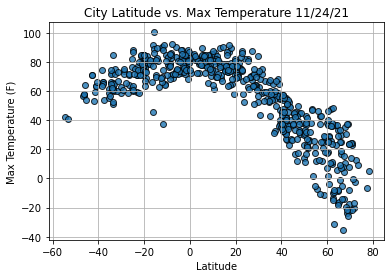

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/ Fig1.png")

# Show plot.
plt.show()

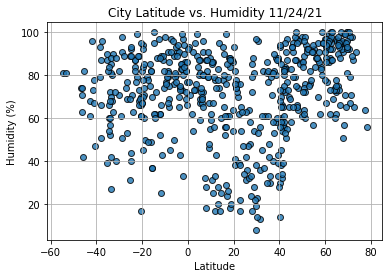

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

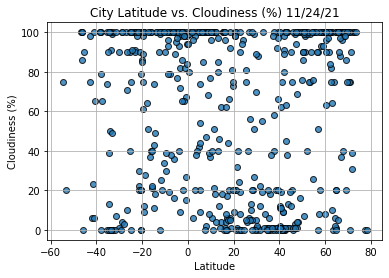

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

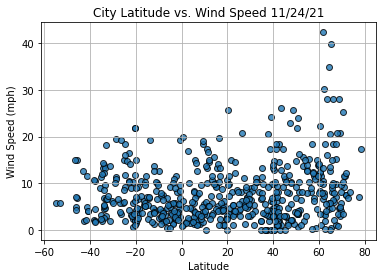

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()